TELECOM CUSTOMER CHURN PREDICTION

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as zscore
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [5]:
#1. Read the data set
df= pd.read_csv('TelcomCustomer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
2.# shape and info 
df.shape

(7043, 21)

In [8]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [9]:
#Check the percentage of missing values in each column of the dataframe. Drop the missing values if there are any 
df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

THERE ARE NO MISSING VALUES

In [7]:
#Check if there are any duplicate records in the dataset? If any drop them

len(df[df.duplicated()])

0

THERE ARE NO DUPLICATE RECORDS.

In [10]:
#Drop the columns which you think redundant for the analysis 
df = df.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
#Encode the categorical values
object_type_variables = [i for i in df[['gender', 'Dependents', 'Partner', 
                                        'PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 
                                        'OnlineBackup', 'PaperlessBilling', 'PaymentMethod', 'Churn']] if df.dtypes[i] == object]
object_type_variables

le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q= le.fit_transform(df[i].astype(str))
        df[i] =q
        df[i] = df[i].astype(int)
encoder(df)

df= pd.get_dummies(df, drop_first= True)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df =pd.get_dummies(df,drop_first=True)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Perform a detailed univariate, bivariate, and multivariate analysis with
appropriate plots and add detailed comments after each analysis

In [19]:
#Multivariate analysis

#Quantitative-Quantitative
#Correlation matrix
numerical = list(set(df.columns)-set(['state', 'international plan', 'voice mail plan',
                                     'area code', 'churn', 'customer service calls']))
corr_matrix = df[numerical].corr()
corr_matrix

,TotalCharges_5550.1,TotalCharges_4698.05,TotalCharges_216.9,TotalCharges_2658.8,TotalCharges_6218.45,TotalCharges_576.65,TotalCharges_4520.15,TotalCharges_6668.05,TotalCharges_1941.5,TotalCharges_51.2,...,TotalCharges_1269.55,TotalCharges_2093.9,TotalCharges_1412.4,TotalCharges_96.05,TotalCharges_1793.25,TotalCharges_1183.8,TotalCharges_100.9,TotalCharges_6613.65,TotalCharges_1907.85,TotalCharges_1236.15
TotalCharges_5550.1,1.000000,-0.000142,-0.000142,-0.000142,-0.000142,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142
TotalCharges_4698.05,-0.000142,1.000000,-0.000142,-0.000142,-0.000142,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142
TotalCharges_216.9,-0.000142,-0.000142,1.000000,-0.000142,-0.000142,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142
TotalCharges_2658.8,-0.000142,-0.000142,-0.000142,1.000000,-0.000142,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142
TotalCharges_6218.45,-0.000142,-0.000142,-0.000142,-0.000142,1.000000,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TotalCharges_1183.8,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,1.000000,-0.000142,-0.000142,-0.000142,-0.000142
TotalCharges_100.9,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,1.000000,-0.000142,-0.000142,-0.000142
TotalCharges_6613.65,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,1.000000,-0.000142,-0.000142
TotalCharges_1907.85,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000201,-0.000142,-0.000142,-0.000142,-0.000142,...,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,1.000000,-0.000142


<AxesSubplot:>

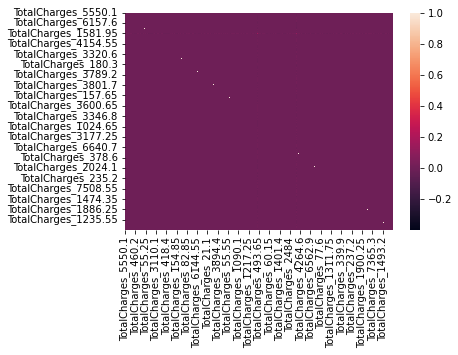

In [20]:
sns.heatmap(corr_matrix)

we can notice that there are 4 variables ( 'total day charge', 'total eve charge', 'total night charge', 'total intl charge' ) are directly depended on ('total day call', 'total eve calls', 'total night calls', 'total intl calls'). These are called dependent variables and can be leftout since they do not contribute any additional information. so let's drop them

<AxesSubplot:>

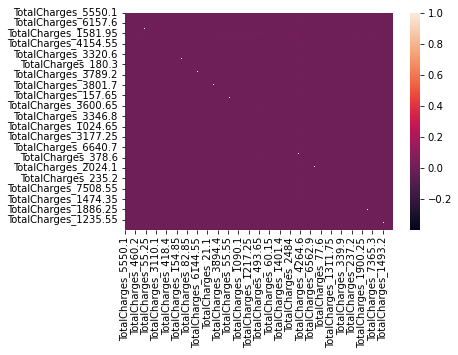

In [21]:
numerical = list(set(numerical)-set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

Store the target column (i.e. Churn) in the y variable and the rest of the
columns in the X variable (2 points)

In [13]:
X= df.drop('Churn', axis =1)
y= df['Churn']

Split the dataset into two parts (i.e. 70% train and 30% test) 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

length of X_train and x_test:  4930 2113
length of y_train and y_test:  4930 2113
(4930, 6548) (2113, 6548)
(4930,) (2113,)


Standardize the columns using z-score scaling approach

In [15]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00014201e+00 -1.87397771e-03 -1.80833642e-03 ... -1.20322050e-02
   1.18054377e-02 -1.20322050e-02]
 [-1.87397771e-03  1.00014201e+00  1.64809977e-02 ... -5.24304882e-03
  -5.24304882e-03 -5.24304882e-03]
 [-1.80833642e-03  1.64809977e-02  1.00014201e+00 ... -1.15204773e-02
   1.23298230e-02 -1.15204773e-02]
 ...
 [-1.20322050e-02 -5.24304882e-03 -1.15204773e-02 ...  1.00014201e+00
  -1.42025278e-04 -1.42025278e-04]
 [ 1.18054377e-02 -5.24304882e-03  1.23298230e-02 ... -1.42025278e-04
   1.00014201e+00 -1.42025278e-04]
 [-1.20322050e-02 -5.24304882e-03 -1.15204773e-02 ... -1.42025278e-04
  -1.42025278e-04  1.00014201e+00]]


Write a function. (8 points)
i) Which can take the model and data as inputs.
ii) Fit the model with the train data.
iii) Make predictions on the test set.
iv) Returns the Accuracy Score

In [16]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy =accuracy_score(y_test,pred)
    return accuracy


12.Use the function and train a Logistic regression, KNN, and Naive Bayes, Decision tree, Random forest, Boosting and Stacking Classifier models and
make predictions on test data. (8)



In [17]:
lr= LogisticRegression()
nb= GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()
estimators = [('rf', rf), ('knn',knn), ('gb', gb), ('adb', adb)]
sc= StackingClassifier(estimators =estimators, final_estimator =rf)

result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision tree',
                                                                 'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)


C:\Users\Binny Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
13. Display and compare all the models designed with their test accuracies.(4)

In [18]:
print(result)

                     Accuracy
Logistic Regression  0.821581
Naive Bayes          0.275911
KNN                  0.789399
Decision tree        0.781354
Random Forest        0.802650
Ada Boost            0.805963
Gradient Boost       0.810696
Stacking             0.786559


In [ ]:
14. Select the final best trained model along with your detailed comments for selecting this model. (3 points)

The best trained model is Logistic Regressionsince it gives an accuracy of 0.821581.

15. Write your conclusion on the results.